In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from random import seed
from scipy import stats
import seaborn as sns
import pingouin as pg

Load data

In [13]:
# load data from pickle and convert to dataframe
brain_test = pd.read_pickle("3_brain_test.pkl")
brain_train = pd.read_pickle("3_brain_train.pkl")
main_test = pd.read_pickle("3_main_test.pkl")
main_train = pd.read_pickle("3_main_train.pkl")
brain_test = pd.DataFrame(brain_test)
brain_train = pd.DataFrame(brain_train)
main_test = pd.DataFrame(main_test)
main_train = pd.DataFrame(main_train)

Select with or without excluded subjects

In [ ]:
#main_test = main_test[main_test["Excluded"]==0]

Show the data

In [26]:
main_test.head()

,Age,Gender,Total PA,Vigorous PA,Moderate PA,Light PA,BMI,ECG max workload,ECG max heart rate,SR Walking PA,SR Moderate PA,SR Vigorous PA,Hand grip L,Hand grip R,Excluded,BA ASEG Corr,BA ASEG Delta Corr,BA A2009 Corr,BA A2009 Delta Corr
2,73.0,Female,2550.2400,10.0800,352.8000,2187.3600,26.9,NaN,NaN,1188.0,120.0,0.0,20.0,26.0,0,84.851897,11.851897,82.052421,9.052421
6,67.0,Male,1302.9120,0.0000,100.2240,1202.6880,34.2,NaN,NaN,330.0,2880.0,1080.0,42.0,36.0,1,69.747088,2.747088,50.378044,-16.621956
12,56.0,Male,1601.3088,18.9504,227.4048,1354.9536,28.4,120.0,117.0,396.0,900.0,0.0,35.0,39.0,1,53.517921,-2.482079,59.669890,3.669890
21,56.0,Female,2465.2224,29.1168,427.0464,2009.0592,33.6,NaN,NaN,2970.0,720.0,240.0,18.0,18.0,1,46.272955,-9.727045,51.703857,-4.296143
25,70.0,Female,2746.1376,10.0224,210.4704,2525.6448,22.1,NaN,NaN,2772.0,240.0,320.0,22.0,20.0,0,54.703361,-15.296639,59.362556,-10.637444


# Basic distributions

- Comparing training and test set based on
    - Gender
    - Age
    - Self-reported PA
    - ??
- Comparing excluded and included subjects based on
    - Gender
    - Age
    - PA
    - Brain Age Delta

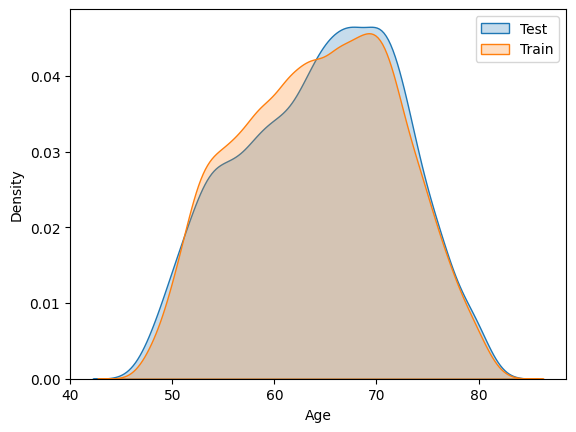

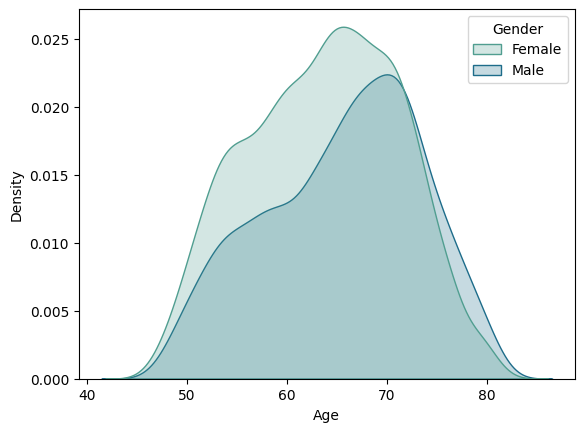

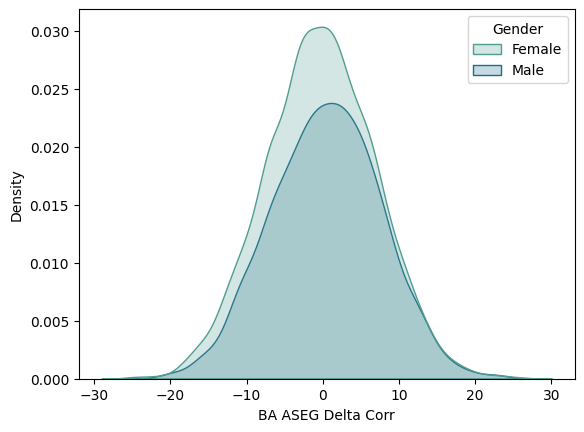

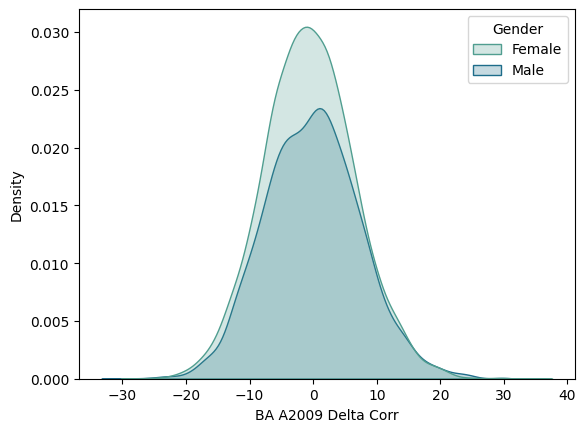

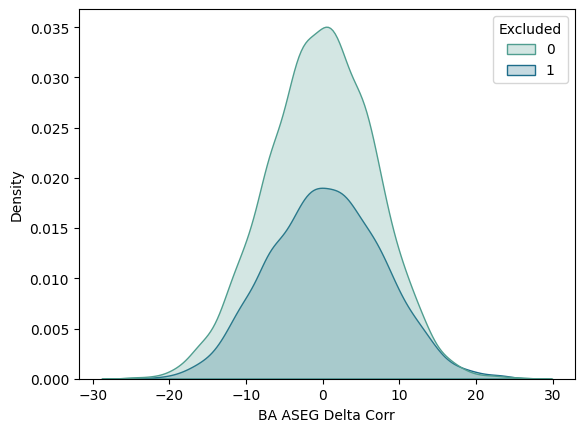

In [20]:
plt.figure()
sns.kdeplot(data = main_test, x= 'Age', fill=True, label = "Test")
sns.kdeplot(data = main_train, x= 'Age', fill=True, label = "Train")
plt.legend()
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'Age', hue = 'Gender', fill=True, palette = "crest")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'BA ASEG Delta Corr', hue = 'Gender', fill=True, palette = "crest")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'BA A2009 Delta Corr', hue = 'Gender', fill=True, palette = "crest")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'BA ASEG Delta Corr', hue = 'Excluded', fill=True, palette = "crest")
plt.show()


Physical activity

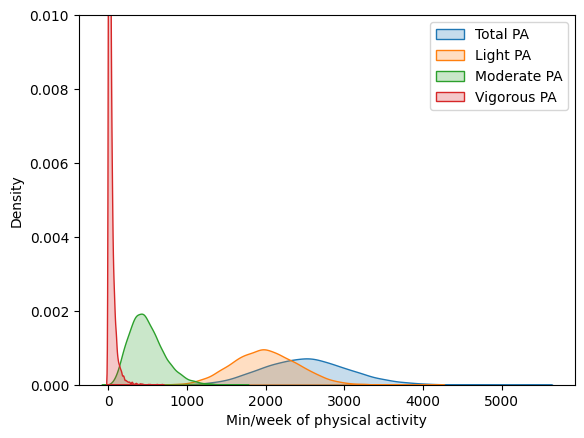

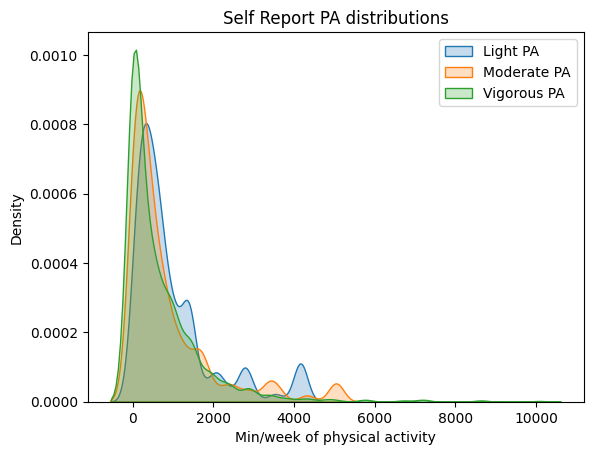

In [21]:
plt.figure()
sns.kdeplot(data = main_test, x= 'Total PA', fill=True, label = "Total PA")
sns.kdeplot(data = main_test, x= 'Light PA', fill=True, label = "Light PA")
sns.kdeplot(data = main_test, x= 'Moderate PA', fill=True, label = "Moderate PA")
sns.kdeplot(data = main_test, x= 'Vigorous PA', fill=True, label = "Vigorous PA")
plt.xlabel("Min/week of physical activity")
plt.legend()
plt.ylim(0,0.01)
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'SR Walking PA', fill=True, label = "Light PA")
sns.kdeplot(data = main_test, x= 'SR Moderate PA', fill=True, label = "Moderate PA")
sns.kdeplot(data = main_test, x= 'SR Vigorous PA', fill=True, label = "Vigorous PA")
plt.xlabel("Min/week of physical activity")
plt.title("Self Report PA distributions")
plt.legend()
plt.show()

Scatterplots -> Association with BrainAge

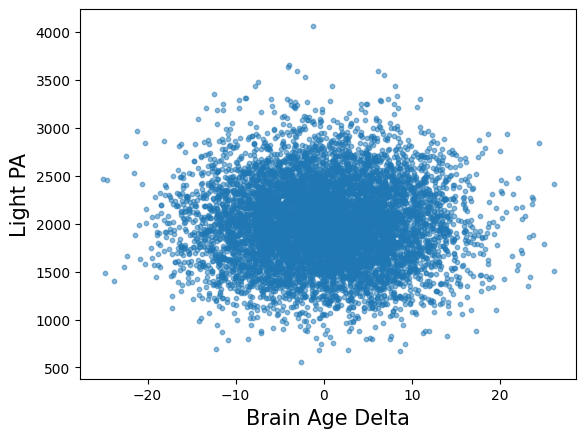

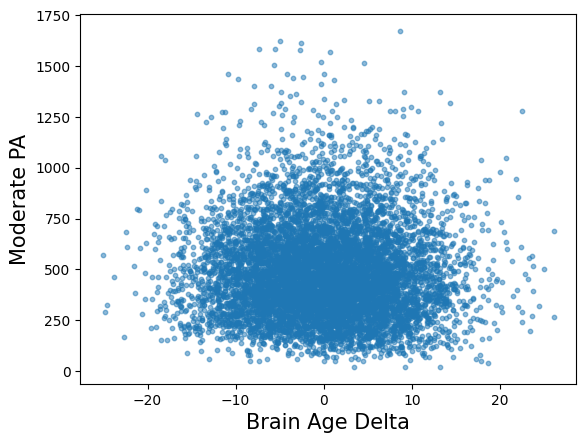

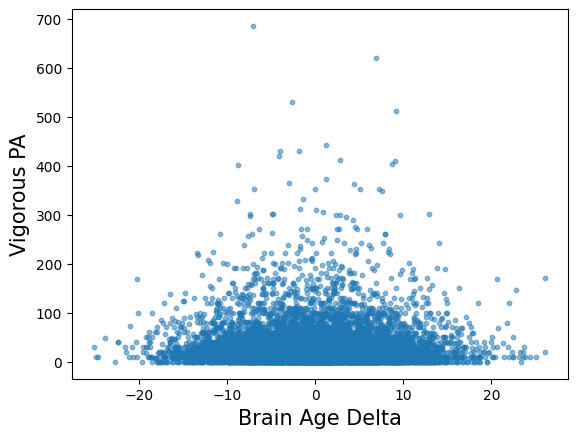

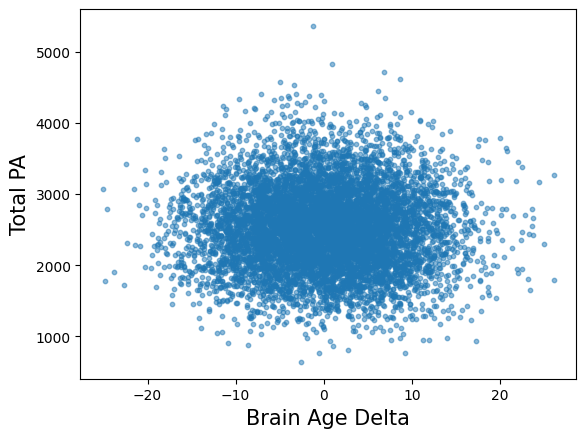

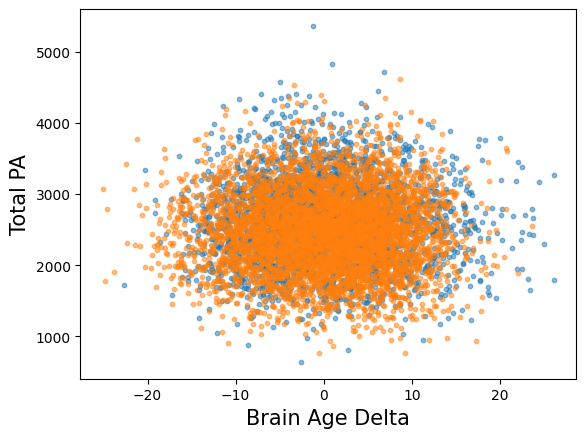

In [23]:
plt.figure()
plt.scatter(main_test["BA ASEG Delta Corr"], main_test["Light PA"], alpha=0.5, s=10)
plt.ylabel("Light PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.show()

plt.figure()
plt.scatter(main_test["BA ASEG Delta Corr"], main_test["Moderate PA"], alpha=0.5,s=10)
plt.ylabel("Moderate PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.show()

plt.figure()
plt.scatter(main_test["BA ASEG Delta Corr"], main_test["Vigorous PA"], alpha=0.5, s=10)
plt.ylabel("Vigorous PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.show()

plt.figure()
plt.scatter(main_test["BA ASEG Delta Corr"], main_test["Total PA"], alpha=0.5, s=10)
plt.ylabel("Total PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.show()

main_test_1 = main_test[main_test["Age"]<63]
main_test_2 = main_test[main_test["Age"]>=63]

plt.figure()
plt.scatter(main_test_1["BA ASEG Delta Corr"], main_test_1["Total PA"], alpha=0.5, s=10)
plt.scatter(main_test_2["BA ASEG Delta Corr"], main_test_2["Total PA"], alpha=0.5, s=10)
plt.ylabel("Total PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.show()

## Correlation Heatmap

<AxesSubplot:>

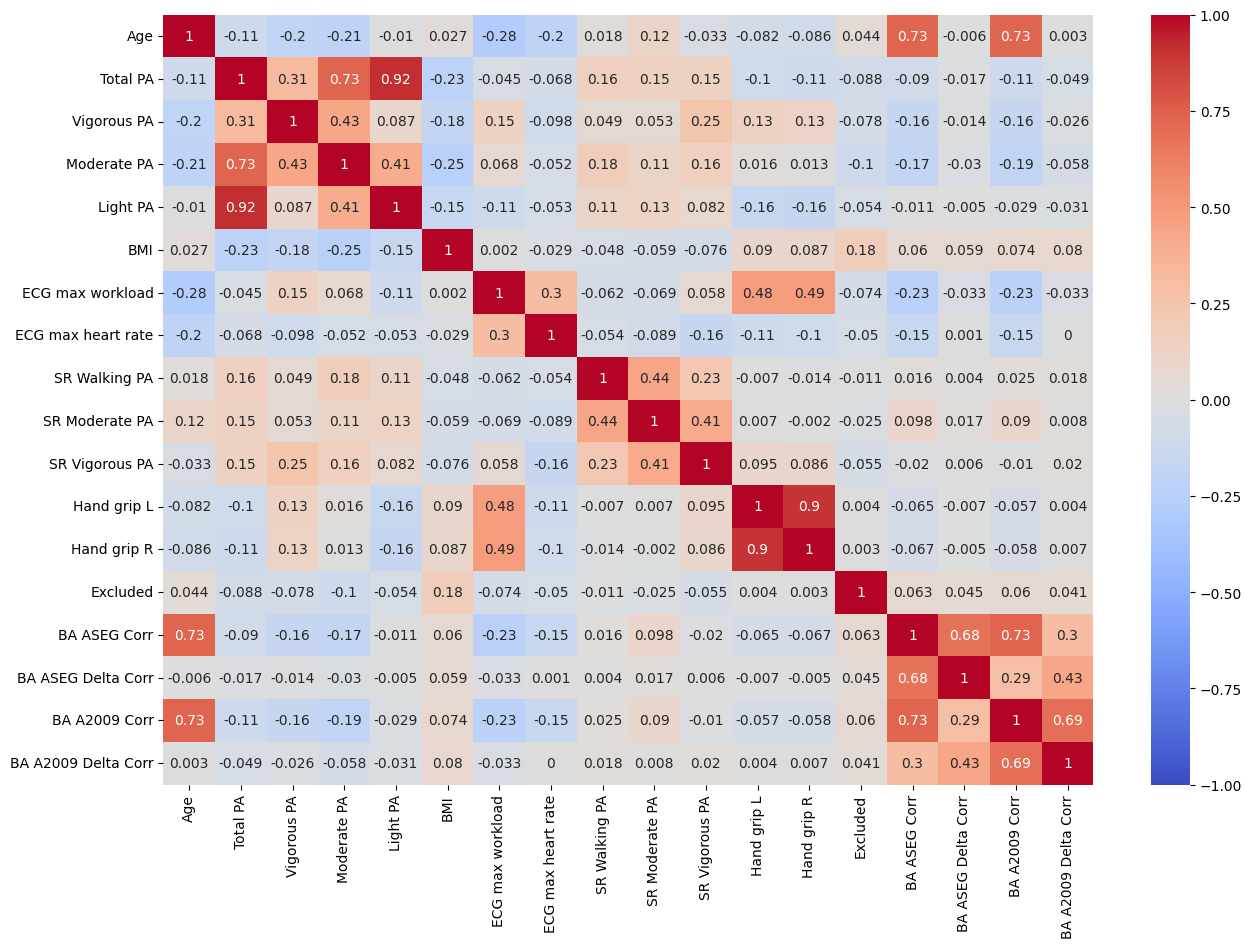

In [24]:
# heat map correlation matrix
# use pcorr to get partial correlations
corr = main_test.corr()
corr = round(corr,3)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
